In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## Downloading Dataset

In [2]:
df_obesity = pd.read_csv("data/ObesityDataSet.csv")
df_obesity = df_obesity.rename(columns={'family_history_with_overweight': 'FAM_OVERWEIGHT', 'NObeyesdad': 'Obesity_level'})
TARGET_VAR = 'Obesity_level'
OTHER_FEATURES = df_obesity.columns.drop(['Obesity_level'])

In [3]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   FAM_OVERWEIGHT  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity_level   2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [4]:
df_obesity

,Gender,Age,Height,Weight,FAM_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
set(df_obesity['MTRANS'])

{'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'}

In [6]:
# Walking -> 0
# Bike -> 0.15
# Public -> 0.5
# Motor -> 0.75
# Automobile -> 1

df_obesity['MTRANS'] = df_obesity['MTRANS'].map({'Walking': 0.0, 'Bike': 0.15, 'Public_Transportation': 0.5, 'Motorbike': 0.75, 'Automobile': 1.0})

In [7]:
set(df_obesity['CAEC']), set(df_obesity['CALC'])

({'Always', 'Frequently', 'Sometimes', 'no'},
 {'Always', 'Frequently', 'Sometimes', 'no'})

In [8]:
FREQ_CATEG_to_NUM = {'Always' : 1.0, 'Frequently' : 0.66, 'Sometimes' : 0.33, 'no' : 0.0}

df_obesity['CAEC'] = df_obesity['CAEC'].map(FREQ_CATEG_to_NUM)
df_obesity['CALC'] = df_obesity['CALC'].map(FREQ_CATEG_to_NUM)

In [9]:
set(df_obesity['FAM_OVERWEIGHT']), set(df_obesity['FAVC']), set(df_obesity['SMOKE']), set(df_obesity['SCC'])

({'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'})

In [10]:
BIN_CATEG_to_NUM = {'yes' : 1.0, 'no' : 0.0}

df_obesity['FAM_OVERWEIGHT'] = df_obesity['FAM_OVERWEIGHT'].map(BIN_CATEG_to_NUM)
df_obesity['FAVC'] = df_obesity['FAVC'].map(BIN_CATEG_to_NUM)
df_obesity['SMOKE'] = df_obesity['SMOKE'].map(BIN_CATEG_to_NUM)
df_obesity['SCC'] = df_obesity['SCC'].map(BIN_CATEG_to_NUM)

In [11]:
set(df_obesity['Gender'])

{'Female', 'Male'}

In [12]:
df_obesity['Gender'] = df_obesity['Gender'].map({'Male': 1.0, 'Female': 0.0})

In [13]:
set(df_obesity['Obesity_level'])


{'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'}

In [14]:
OBESITY_TRANSFORM_MAP = {'Insufficient_Weight' : 0,
                         'Normal_Weight'       : 1,
                         'Overweight_Level_I'  : 2,
                         'Overweight_Level_II' : 3,
                         'Obesity_Type_I'      : 4,
                         'Obesity_Type_II'     : 5,
                         'Obesity_Type_III'    : 6}

df_obesity['Obesity_level'] = df_obesity['Obesity_level'].map(OBESITY_TRANSFORM_MAP)

In [15]:
list(OBESITY_TRANSFORM_MAP.keys())

['Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III']

In [16]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   float64
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   FAM_OVERWEIGHT  2111 non-null   float64
 5   FAVC            2111 non-null   float64
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   float64
 9   SMOKE           2111 non-null   float64
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   float64
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   float64
 15  MTRANS          2111 non-null   float64
 16  Obesity_level   2111 non-null   int64  
dtypes: float64(16), int64(1)
memory u

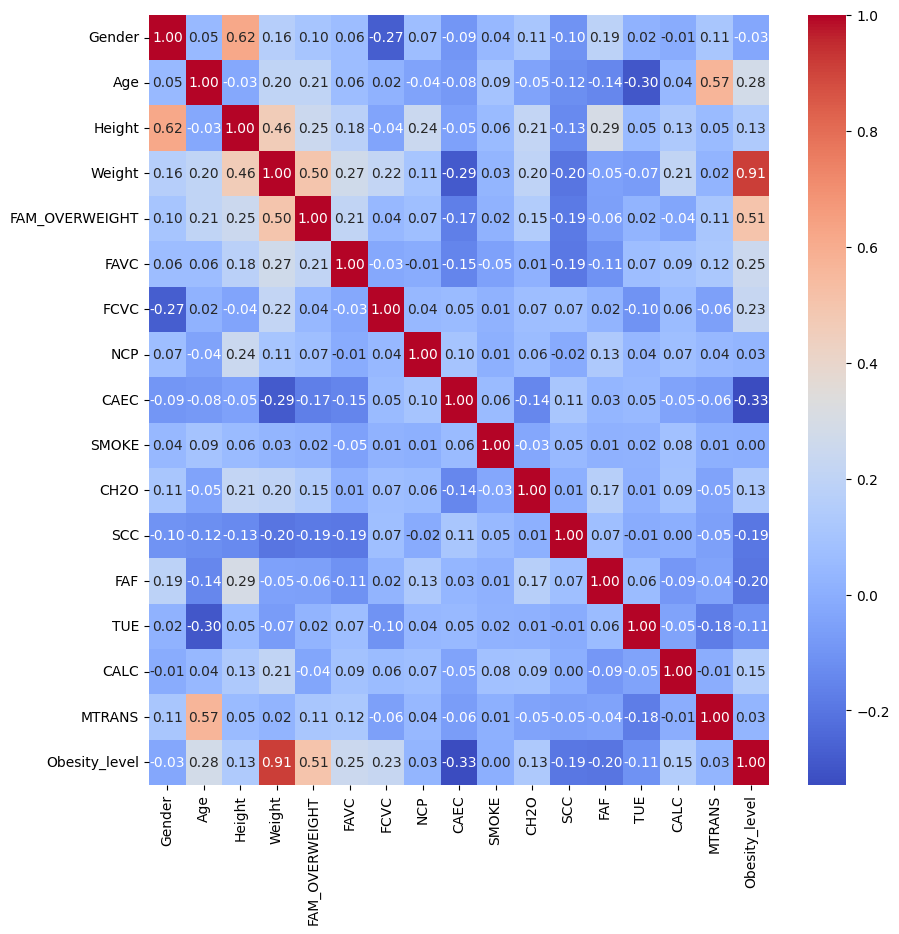

In [17]:
corr = df_obesity.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Plots

In [18]:
# for i in range(len(OTHER_FEATURES)):
#     fig_bp = plt.figure()
#     ax_bp = sns.boxplot(x=TARGET_VAR, y=OTHER_FEATURES[i], data=df_obesity)

In [19]:
# sns.pairplot(df_obesity.drop(['Gender', 'SMOKE', 'FAM_OVERWEIGHT', 'SCC', 'FAVC'], axis=1), hue=TARGET_VAR, palette = 'Set1')

## Data normalization

In [20]:
from sklearn.preprocessing import LabelEncoder

OBESITY_NAMES_UPD = [f"{code} ({level})" for [level, code] in OBESITY_TRANSFORM_MAP.items()]

enc_m = LabelEncoder()
enc_m.fit(OBESITY_NAMES_UPD)
df_obesity['Obesity_level'] = enc_m.inverse_transform(df_obesity['Obesity_level'])

df_obesity

,Gender,Age,Height,Weight,FAM_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,0.33,0.0,2.000000,0.0,0.000000,1.000000,0.00,0.5,1 (Normal_Weight)
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.33,1.0,3.000000,1.0,3.000000,0.000000,0.33,0.5,1 (Normal_Weight)
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.33,0.0,2.000000,0.0,2.000000,1.000000,0.66,0.5,1 (Normal_Weight)
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.33,0.0,2.000000,0.0,2.000000,0.000000,0.66,0.0,2 (Overweight_Level_I)
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.33,0.0,2.000000,0.0,0.000000,0.000000,0.33,0.5,3 (Overweight_Level_II)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.33,0.0,1.728139,0.0,1.676269,0.906247,0.33,0.5,6 (Obesity_Type_III)
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.33,0.0,2.005130,0.0,1.341390,0.599270,0.33,0.5,6 (Obesity_Type_III)
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.33,0.0,2.054193,0.0,1.414209,0.646288,0.33,0.5,6 (Obesity_Type_III)
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.33,0.0,2.852339,0.0,1.139107,0.586035,0.33,0.5,6 (Obesity_Type_III)


### Spliting into train and test sets

In [21]:
from sklearn.model_selection import train_test_split

X, y = df_obesity.drop(['Obesity_level'], axis=1), df_obesity['Obesity_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Standardizing the Variables

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## kNN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

k_max = 40
p_sel = 2
weight_sel = 'distance'

### Selecting k value to minimize error rate

Using L_p metric (for p = 2) and distance as weight

In [24]:
error_rate = []
for k in range(1, k_max):
    knn_trial = KNeighborsClassifier(n_neighbors=k, p=p_sel, weights=weight_sel)
    knn_trial.fit(X_train, y_train)
    pred_k = knn_trial.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

k_optimal = np.argmin(error_rate) + 1

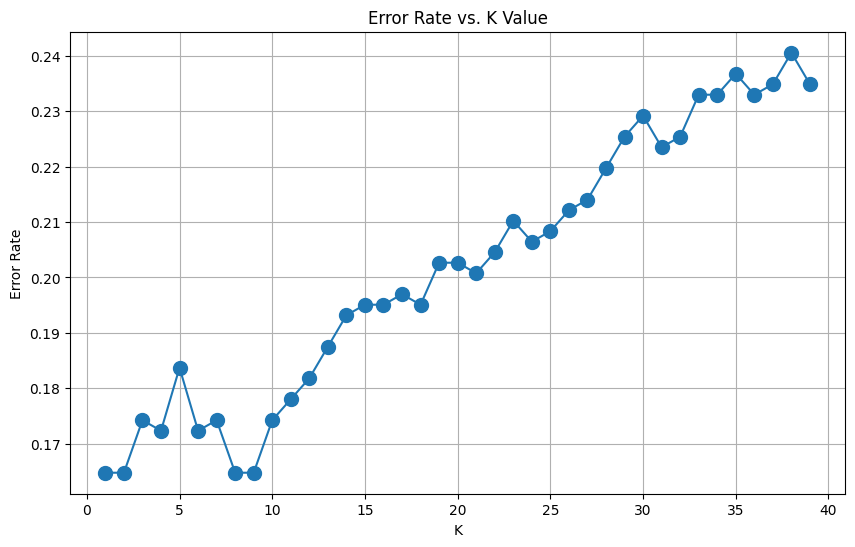

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1, k_max), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [26]:
print(f"Optimal K value is {k_optimal}")

Optimal K value is 1


### Estimate accuracy for model

In [27]:
knn = KNeighborsClassifier(n_neighbors=k_optimal, p=p_sel, weights=weight_sel)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print()
print(classification_report(y_test, knn_pred))

[[68  1  3  2  0  0  0]
 [10 39 13 10  5  0  0]
 [ 2  9 52  5  2  0  0]
 [ 2  3  5 52  1  0  0]
 [ 0  4  5  3 74  0  0]
 [ 0  0  0  2  0 76  0]
 [ 0  0  0  0  0  0 80]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.83      0.92      0.87        74
      1 (Normal_Weight)       0.70      0.51      0.59        77
 2 (Overweight_Level_I)       0.67      0.74      0.70        70
3 (Overweight_Level_II)       0.70      0.83      0.76        63
     4 (Obesity_Type_I)       0.90      0.86      0.88        86
    5 (Obesity_Type_II)       1.00      0.97      0.99        78
   6 (Obesity_Type_III)       1.00      1.00      1.00        80

               accuracy                           0.84       528
              macro avg       0.83      0.83      0.83       528
           weighted avg       0.84      0.84      0.83       528



## Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [35]:
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
dec_t_pred = dec_tree.predict(X_test)

In [37]:
print(confusion_matrix(y_test, dec_t_pred))
print()
print(classification_report(y_test, dec_t_pred))


[[66  8  0  0  0  0  0]
 [ 2 68  6  1  0  0  0]
 [ 0  7 62  1  0  0  0]
 [ 0  0  3 59  1  0  0]
 [ 0  0  0  2 79  5  0]
 [ 0  0  0  0  2 76  0]
 [ 0  0  0  0  1  0 79]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.97      0.89      0.93        74
      1 (Normal_Weight)       0.82      0.88      0.85        77
 2 (Overweight_Level_I)       0.87      0.89      0.88        70
3 (Overweight_Level_II)       0.94      0.94      0.94        63
     4 (Obesity_Type_I)       0.95      0.92      0.93        86
    5 (Obesity_Type_II)       0.94      0.97      0.96        78
   6 (Obesity_Type_III)       1.00      0.99      0.99        80

               accuracy                           0.93       528
              macro avg       0.93      0.93      0.93       528
           weighted avg       0.93      0.93      0.93       528



In [39]:
plt.figure(figsize = (100, 100))
plot_tree(dec_tree, feature_names=OTHER_FEATURES, 
          class_names=OBESITY_NAMES_UPD, filled = True)
plt.show()